In [2]:
import pandas as pd
import geopandas
%matplotlib inline

In [3]:
fields = pd.read_csv('fields.csv')
neighborhood_counts = fields['Neighborhood'].value_counts()
neighborhood_counts = neighborhood_counts.reset_index()
neighborhood_counts.columns = ['Neighborhood', 'Count']
neighborhood_counts = neighborhood_counts.sort_values(by='Count', ascending=False)
neighborhoods = geopandas.read_file("Neighborhoods/Neighborhoods_.shp")

In [9]:
fields_map = neighborhoods.merge(neighborhood_counts, how='left', left_on='hood', right_on='Neighborhood')
fields_map = fields_map.sort_values(by='Count', ascending=False)
fields_map[['hood','Count','geometry']].head()

,hood,Count,geometry
24,Squirrel Hill South,7.0,"POLYGON ((-79.94475 40.44101, -79.94405 40.440..."
59,Brighton Heights,7.0,"POLYGON ((-80.04078 40.49142, -80.03756 40.490..."
42,Morningside,6.0,"POLYGON ((-79.93183 40.49041, -79.93129 40.490..."
41,Brookline,6.0,"POLYGON ((-80.00172 40.40193, -80.00171 40.401..."
18,Hazelwood,4.0,"POLYGON ((-79.95505 40.42713, -79.95498 40.427..."


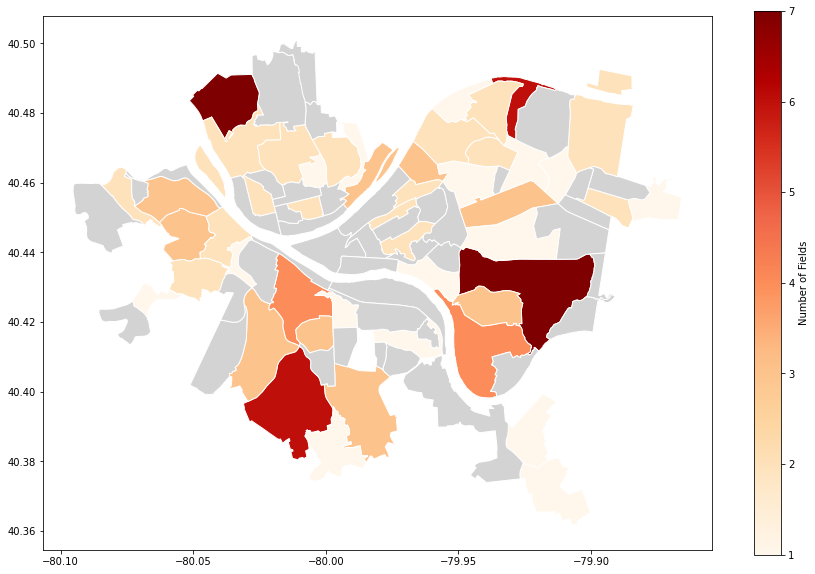

In [8]:
fields_map.plot(column='Count', # set the data to be used for coloring
               cmap='OrRd',              # choose a color palette
               edgecolor="white",        # outline the districts in white
               legend=True,              # show the legend
               legend_kwds={'label': "Number of Fields"}, # label the legend
               figsize=(15, 10),         # set the size
               missing_kwds={"color": "lightgrey"} # set disctricts with no data to gray
               )